In [ ]:
# Stocks Symbol List Data Source: https://datahub.io/core/nyse-other-listings#python
# Stock Data Source: FinnHub

In [9]:
# packages
# data
import finnhub
from datapackage import Package
import yfinance as yf

# scientific
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# utils
import time
import requests
import json



In [ ]:
################################################################################################

In [ ]:
# Gathering data from https://datahub.io/core/nyse-other-listings#python 
# -- on 01.12.2021 8497 symbols were captured
# stocks = []
# package = Package('https://datahub.io/core/nyse-other-listings/datapackage.json')

# # print list of all resources:
# # print(package.resource_names)

# # print processed tabular data (if exists any)
# for resource in package.resources:
#     if resource.descriptor['datahub']['type'] == 'derived/csv':
#         for entry in resource.read():
#             stocks.append(entry[0])

In [11]:
# EXTRA SYMBOLS
weed_stocks = ["GRWG", "JUSHF", "CRLBF", "HRVSF", "MJ", "CURLF", "CGC", "CRON", "MEDIF"]

tech_stocks = ["SNE", "XRX", "CSCO", "SIRI", "ROKU", "ATVI", "EA", "VZ", "T", "TMUS", "AMAT",
              "TXN", "MU", "FB", "MSFT", "SNAP", "AMZN", "TWTR", "AMD", "QCOM", "AVGO", "AAPL",
              "INTC", "NVDA", "NFLX"]

fin_stocks = ["AXP", "V", "MA", "JPM", "DFS", "MS", "BAC", "GS", "SQ", "PYPL", "GDOT"]

energy_stocks = ["NGG", "PCG", "RDS-B", "OXY", "MRO", "DD", "CVX", "DOW", "XOM", "PSX", "COP", 
              "HAL", "PLUG"]

travel_stocks = ["LUV", "MAR", "ABNB", "CCL", "RCL", "DIS", "AAL", "JBLU", "SAVE", "DAL", "HLT"]

food_consumer_stocks = ["DRI", "GIS", "NKE", "PG", "SHAK", "GRUB", "KDP", "PEP", "KO", "K", "QSR", "CMG",
              "YUM", "BGS", "ACI", "DAR", "KR", "GE", "GOOS", "HD", "LOW", "LULU", "DPZ", "SBUX", "MMM",
              "WMT", "TGT", "COST", "JACK", "MCD", "UBER", "GME"]

pharma_stocks = ["CVS", "RAD", "UNH", "LLY", "JNJ", "BMY", "AZN", "MRK", "ABBV", "GILD", "PFE"]

defense_infra_stocks = ["GD", "LMT", "NOC", "BA", "CAT", "WM"]

auto_stocks = ["HMC", "TM", "F", "TSLA", "GM"]

misc_stocks = ["ISR"]

# all_stocks = (weed_stocks + tech_stocks + fin_stocks + energy_stocks 
#                 + travel_stocks + food_consumer_stocks + pharma_stocks 
#                 + defense_infra_stocks + auto_stocks + misc_stocks)

all_stocks = (weed_stocks + tech_stocks + fin_stocks + energy_stocks 
              + travel_stocks + food_consumer_stocks + defense_infra_stocks 
              + auto_stocks + misc_stocks)

# for symb in all_stocks:
#     if str(symb) not in stocks:
#         stocks.append(str(symb))

In [ ]:
# scrubbing data of symbols which contain bad_chars = ["$", ";", ":", "!", "*", "."]
# -- run until there is no more output
# bad_chars = ["$", ";", ":", "!", "*", "."]

# for s in stocks:
#     for char in bad_chars:
#         if char in str(s):
#             print(s)
#             stocks.remove(str(s))

In [12]:
display(len(all_stocks))

113

In [ ]:
################################################################################################

In [13]:
df = {}

In [14]:
# Adding company beta and 10_day_avg_volume values to a dataframe
count = 1
repeat = []

# Stock data
for stock in all_stocks:
# for stock in ["ABNB", ]:
    try:
        # request company's beta
        r = requests.get('https://finnhub.io/api/v1/stock/metric?symbol=' + str(stock) + '&metric=all&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()["metric"]
        count += 1

        beta = metrics["beta"]
        vol = metrics["10DayAverageTradingVolume"]
        if beta == None or vol == None or (str(stock) in df.keys()):
            continue

        # fill dictionary
        if beta >= 1.0:
            df[str(stock)] = {"beta": beta, "volume_10_day": vol}

    except:
        display(r.json())
        display(stock)
        repeat.append(stock)
        time.sleep(30)
        pass
    
for stock in repeat:
    try:
        # request company's beta
        r = requests.get('https://finnhub.io/api/v1/stock/metric?symbol=' + str(stock) + '&metric=all&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()["metric"]
        count += 1

        beta = metrics["beta"]
        vol = metrics["10DayAverageTradingVolume"]
        if beta == None or vol == None or (str(stock) in df.keys()):
            continue

        # fill dictionary
        if beta >= 1.0:
            df[str(stock)] = {"beta": beta, "volume_10_day": vol}

    except:
        display(r.json())
        display(stock)
        time.sleep(30)
        pass
    

{'metric': {}, 'metricType': 'all', 'series': {}, 'symbol': 'MJ'}

'MJ'

{'error': 'API limit reached. Please try again later. Remaining Limit: 0'}

'ABNB'

{'metric': {}, 'metricType': 'all', 'series': {}, 'symbol': 'MJ'}

'MJ'

In [15]:
# dataframe to store stock data
data = pd.DataFrame(df)
data = data.transpose()
display(data)

,beta,volume_10_day
GRWG,3.12335,3.63656
CURLF,1.58976,1.58927
CGC,2.36008,1.68735
CRON,2.16141,1.19001
XRX,1.87889,2.05363
...,...,...
BA,1.61462,14.71303
F,1.23697,88.08976
TSLA,2.11570,43.80479
GM,1.39498,28.97006


In [16]:
data['c'] = ''
data['o'] = ''
data['adx'] = ''
data['signal'] = ''
data['trending'] = ''
data['shareOutstanding'] = ''

In [17]:
# adding trends, signals, and price levels
count = 1
repeat = []

# Stock data
# for stock in ["MA", "CURLF", "AXP", "COP", "HAL", "DAR", "GOOS"]:
for stock in data.index:
    try:
        # Aggregate Indicators -- (signal, adx, trending)
        r = requests.get('https://finnhub.io/api/v1/scan/technical-indicator?symbol=' + str(stock) + '&resolution=W&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()
        count += 1

        signal = metrics["technicalAnalysis"]["signal"]
        adx = metrics["trend"]["adx"]
        trending = metrics["trend"]["trending"]

        # add to dataframe
        data.at[str(stock), 'adx'] = adx
        data.at[str(stock), 'signal'] = signal
        data.at[str(stock), 'trending'] = trending


        # company profile -- shareOutstanding 
        r = requests.get('https://finnhub.io/api/v1/stock/profile2?symbol=' + str(stock) + '&token=bvt5fmf48v6rku8bvmn0')
        shares = r.json()["shareOutstanding"]

        # add to dataframe
        data.at[str(stock), 'shareOutstanding'] = shares


        # open price and current price
        r = requests.get('https://finnhub.io/api/v1/quote?symbol=' + str(stock) + '&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()

        # add to dataframe
        data.at[str(stock), 'o'] = metrics['o']
        data.at[str(stock), 'c'] = metrics['c']

        # News Sentiment
        r = requests.get('https://finnhub.io/api/v1/news-sentiment?symbol=' + str(stock) + '&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()

        data.at[str(stock), 'bearish'] = metrics["sentiment"]["bearishPercent"]
        data.at[str(stock), 'bullish'] = metrics["sentiment"]["bullishPercent"]

    except:
        print(str(count) + '...' + str(stock))
        time.sleep(30)
        repeat.append(stock)
        pass
    
print("repeating: " + str(repeat))
for stock in repeat:
    try:
        # Aggregate Indicators -- (signal, adx, trending)
        r = requests.get('https://finnhub.io/api/v1/scan/technical-indicator?symbol=' + str(stock) + '&resolution=W&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()
        count += 1

        signal = metrics["technicalAnalysis"]["signal"]
        adx = metrics["trend"]["adx"]
        trending = metrics["trend"]["trending"]

        # add to dataframe
        data.at[str(stock), 'adx'] = adx
        data.at[str(stock), 'signal'] = signal
        data.at[str(stock), 'trending'] = trending


        # company profile -- shareOutstanding 
        r = requests.get('https://finnhub.io/api/v1/stock/profile2?symbol=' + str(stock) + '&token=bvt5fmf48v6rku8bvmn0')
        shares = r.json()["shareOutstanding"]

        # add to dataframe
        data.at[str(stock), 'shareOutstanding'] = shares


        # open price and current price
        r = requests.get('https://finnhub.io/api/v1/quote?symbol=' + str(stock) + '&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()

        # add to dataframe
        data.at[str(stock), 'o'] = metrics['o']
        data.at[str(stock), 'c'] = metrics['c']

        # News Sentiment
        r = requests.get('https://finnhub.io/api/v1/news-sentiment?symbol=' + str(stock) + '&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()

        data.at[str(stock), 'bearish'] = metrics["sentiment"]["bearishPercent"]
        data.at[str(stock), 'bullish'] = metrics["sentiment"]["bullishPercent"]

    except:
        print(str(count) + '...' + str(stock))
        time.sleep(30)
        pass

17...AVGO
33...DD
49...HLT
65...F
repeating['AVGO', 'DD', 'HLT', 'F']


In [21]:
# data = data.sort_values(by=["signal", "beta", "shareOutstanding"], axis=0, ascending=False)
data = data.sort_values(by=["adx", "shareOutstanding"], axis=0, ascending=False)
# data.to_csv('./data/01_24_20_0932.csv', index=True)
# data = data.drop("RDS-B", axis=0)
n = len(data)
step = 15

data_1 = data[:step]
data_2 = data[step:step*2]
data_3 = data[step*2:step*3]
data_4 = data[step*3:]

ls = [data_1, data_2, data_3, data_4]

for df in ls:
    display(df)
#     break

,beta,volume_10_day,c,o,adx,signal,trending,shareOutstanding,bearish,bullish
GRWG,3.12335,3.63656,49.84,48.16,74.0775,buy,True,36.88,0.0000,1.0000
SNAP,1.29161,19.07045,53.57,53.9,62.9768,strong buy,True,1415.8,0.0000,1.0000
PLUG,1.71386,77.23934,66.87,62.3,59.6765,strong buy,True,303.38,0.2500,0.7500
DAR,1.28887,1.37371,66.78,66.69,58.7865,buy,True,163.78,0.5000,0.5000
GME,1.37064,34.07252,65.01,42.59,57.857,strong buy,True,64.3,0.8000,0.2000
TSLA,2.11570,43.80479,846.64,834.31,56.3417,buy,True,905,0.1539,0.8461
ROKU,1.95563,5.58816,422.85,422,54.301,buy,True,119.9,0.0000,1.0000
SHAK,1.73000,1.08799,111.21,107.26,47.7416,strong buy,True,37.56,0.5000,0.5000
NVDA,1.40356,8.66204,548.5,549.604,46.8495,buy,True,613,0.0000,1.0000
AMD,2.19114,50.01342,92.79,94.42,43.1693,buy,True,1170,0.2500,0.7500


,beta,volume_10_day,c,o,adx,signal,trending,shareOutstanding,bearish,bullish
GE,1.08751,77.21625,11.11,10.97,40.9896,buy,True,8738.43,0.0000,1.0000
MU,1.26457,24.68311,82.28,84.08,40.1254,buy,True,1113,0.0000,1.0000
DFS,1.76691,2.78908,92.27,93.56,39.8027,buy,True,307,0.0000,1.0000
ISR,1.51579,50.09557,2.24,2.31,37.1227,buy,True,68.9,0.5000,0.5000
LUV,1.19432,6.89892,47.39,47.18,35.8518,buy,True,519.06,0.0000,1.0000
CURLF,1.58976,1.58927,15.07,14.98,35.6264,buy,True,470.09,0.5000,0.5000
CGC,2.36008,1.68735,33.8,33.15,35.4186,strong buy,True,350.11,0.5000,0.5000
PYPL,1.13454,6.82510,252,246.65,34.9013,strong buy,True,1173,0.0000,1.0000
AVGO,1.04776,1.64146,465.02,463.724,34.6058,buy,True,407,0.5000,0.5000
DIS,1.17671,8.31942,172.78,174,34.3875,buy,True,1781,0.1250,0.8750


,beta,volume_10_day,c,o,adx,signal,trending,shareOutstanding,bearish,bullish
AAPL,1.26888,104.12757,139.07,136.28,32.1745,strong buy,True,16976.8,0.1924,0.8076
DD,1.67521,15.74439,81.09,80,31.1032,buy,True,738.56,0.5000,0.5000
MS,1.51110,12.33978,74.13,72.55,30.2656,buy,True,0,0.0000,1.0000
GS,1.48588,4.10631,289.39,286.69,28.9284,buy,True,344.07,0.0000,1.0000
MRO,3.32941,35.31295,8.15,8.06,28.8094,neutral,True,796,0.5000,0.5000
JACK,1.73482,0.27103,101.71,98.86,28.5427,buy,True,22.72,0.0000,1.0000
CMG,1.31190,0.26181,1494.18,1492.32,28.0901,buy,True,27.75,0.0000,1.0000
OXY,2.45587,26.21254,21.49,20.67,27.1931,buy,True,894.11,0.5000,0.5000
JBLU,1.59281,8.63605,15.29,15.07,27.1617,buy,True,282,0.5000,0.5000
HLT,1.26807,2.28886,104.96,107.51,26.9315,buy,True,278.99,0.5000,0.5000


,beta,volume_10_day,c,o,adx,signal,trending,shareOutstanding,bearish,bullish
XOM,1.39414,34.57011,47.43,47.01,23.5374,buy,False,4234,0.8750,0.1250
AAL,1.84707,55.48026,15.82,15.57,23.3418,buy,False,428.2,0.5000,0.5000
COP,1.82339,12.96805,42.69,42.06,21.8342,buy,False,1084.87,0.0000,1.0000
PSX,1.70234,3.35282,72.55,71.7,21.671,buy,False,441.03,0.0000,1.0000
MAR,1.83804,2.20175,122.9,125.27,21.1471,buy,False,324,0.0000,1.0000
YUM,1.09614,1.50733,107.09,107.36,21.0394,buy,False,300,0.5000,0.5000
CVX,1.34117,11.28278,91.73,90.4,20.7806,buy,False,1882.17,0.5000,0.5000
LOW,1.36445,4.08002,172.4,171.89,20.5342,neutral,False,763,0.0000,1.0000
BA,1.61462,14.71303,205.84,205.55,20.4244,buy,False,562.91,0.1429,0.8571
CCL,2.29597,33.69316,20.22,20.31,19.8148,buy,False,684,0.0000,1.0000


In [10]:
# filter
for stock in data_1.index:
    tmp = {}
    try:
        series = data_1.loc[stock]
    except:
        
    
    tmp["Symb"] = stock


IndentationError: expected an indented block (<ipython-input-10-90bee20ed59d>, line 9)

In [13]:
# trends
# for stock in (data_1 + data_2 + data_3 + data_4).index:
#     tmp = {}
#     series = data_1.loc[stock]
#     tmp["Symb"] = stock
#     tmp["Trending"] = str(series["trending"])
#     tmp["Signal"] = str(series["signal"])
#     tmp["shareOutstanding"] = str(series["shareOutstanding"])
#     tmp["bearish"] = str(series["bearish"])
#     tmp["bullish"] = str(series["bullish"])
    
#     if tmp["Trending"] == 'True':
#         display(tmp)

In [57]:
# for DEV
# pattern recognition
# for stock in data_1.index:
#     r = requests.get('https://finnhub.io/api/v1/scan/pattern?symbol=' + str(stock) + '&resolution=D&token=bvt5fmf48v6rku8bvmn0')
#     points = r.json()["points"]
#     for entry in points:
#         display(entry)

{'aprice': 1173.1700439453,
 'atime': 1604275200,
 'bprice': 1344.2700195312,
 'btime': 1604880000,
 'cprice': 1222.2199707031,
 'ctime': 1604966400,
 'dprice': 0,
 'dtime': 0,
 'end_price': 1344.2700195312,
 'end_time': 1607299200,
 'entry': 1344.27001953,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 1515.36999512,
 'profit2': 0,
 'sortTime': 1607299200,
 'start_price': 1344.2700195312,
 'start_time': 1603411200,
 'status': 'complete',
 'stoploss': 1156.06004639,
 'symbol': 'CMG.US',
 'terminal': 0}

{'aprice': 1182.9899902344,
 'atime': 1600646400,
 'bprice': 1287.8399658203,
 'btime': 1600819200,
 'cprice': 1214,
 'ctime': 1601596800,
 'dprice': 0,
 'dtime': 0,
 'end_price': 1287.8399658203,
 'end_time': 1601942400,
 'entry': 1287.83996582,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 1392.68994141,
 'profit2': 0,
 'sortTime': 1601942400,
 'start_price': 1287.8399658203,
 'start_time': 1600128000,
 'status': 'successful',
 'stoploss': 1172.50499268,
 'symbol': 'CMG.US',
 'terminal': 0}

{'aprice': 35.621402189347634,
 'atime': 1607904000,
 'bprice': 31.298770825808226,
 'btime': 1607904000,
 'cprice': 44.19122703796177,
 'ctime': 1608768000,
 'dprice': 39.868595674422366,
 'dtime': 1608768000,
 'entry': 44.191227037962,
 'entry_date': 1588896000,
 'eprice': 17.950000762939,
 'etime': 1604361600,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 48.513858401501,
 'profit2': 61.86262846437,
 'sortTime': 1608768000,
 'status': 'failed',
 'stoploss': 39.868595674422,
 'symbol': 'GRWG.US',
 'terminal': 0}

{'aprice': 37.189998626709,
 'atime': 1606694400,
 'bprice': 32.229999542236,
 'btime': 1606780800,
 'cprice': 36.5,
 'ctime': 1607040000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 32.229999542236,
 'end_time': 1607385600,
 'entry': 32.22999954,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 27.27000046,
 'profit2': 0,
 'sortTime': 1607385600,
 'start_price': 32.229999542236,
 'start_time': 1606262400,
 'status': 'failed',
 'stoploss': 37.68599854,
 'symbol': 'GRWG.US',
 'terminal': 0}

{'aprice': 17.889999389647997,
 'atime': 1597968000,
 'bprice': 14.45211327502134,
 'btime': 1597968000,
 'cprice': 15.201735526313197,
 'ctime': 1598918400,
 'dprice': 11.76384941168654,
 'dtime': 1598918400,
 'entry': 15.201735526313,
 'entry_date': 1599004800,
 'eprice': 6.8899998664856,
 'etime': 1594684800,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 18.63962164094,
 'profit2': 26.201735049476,
 'sortTime': 1598918400,
 'status': 'success',
 'stoploss': 11.763849411687,
 'symbol': 'GRWG.US',
 'terminal': 0}

{'aprice': 7.8213000297546,
 'atime': 1591660800,
 'dprice': 6.0100002288818,
 'dtime': 1592179200,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1592179200,
 'status': 'complete',
 'symbol': 'GRWG.US'}

{'aprice': 86.76000213623,
 'atime': 1604880000,
 'bprice': 74.309997558594,
 'btime': 1605139200,
 'cprice': 82.050003051758,
 'ctime': 1605657600,
 'dprice': 75.040901184082,
 'dtime': 1605830400,
 'entry': 79.43333689372,
 'entry_date': 1606176000,
 'intersect_price': 75.92710435274952,
 'intersect_time': 1606953600,
 'mature': 1,
 'patternname': 'Triangle',
 'patterntype': 'bullish',
 'profit1': 91.88334147135,
 'profit2': 0,
 'sortTime': 1605830400,
 'status': 'complete',
 'stoploss': 74.23568756104,
 'symbol': 'SHAK.US',
 'terminal': 0}

{'aprice': 70.900001525879,
 'atime': 1600300800,
 'bprice': 65.66413670972081,
 'btime': 1600300800,
 'cprice': 67.10552945054864,
 'ctime': 1601251200,
 'dprice': 61.869664634390446,
 'dtime': 1601251200,
 'entry': 67.10552945055,
 'entry_date': 1601337600,
 'eprice': 50.490001678467,
 'etime': 1597017600,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 72.34139426671,
 'profit2': 87.51552929796,
 'sortTime': 1601251200,
 'status': 'success',
 'stoploss': 61.86966463439,
 'symbol': 'SHAK.US',
 'terminal': 0}

{'aprice': 63.799999237061,
 'atime': 1591574400,
 'dprice': 52.279998779297,
 'dtime': 1591833600,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1591833600,
 'status': 'complete',
 'symbol': 'SHAK.US'}

{'aprice': 370.56500244141,
 'atime': 1604275200,
 'bprice': 402.32998657227,
 'btime': 1604620800,
 'cprice': 370,
 'ctime': 1604880000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 402.32998657227,
 'end_time': 1608681600,
 'entry': 402.32998657,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 434.65997314,
 'profit2': 0,
 'sortTime': 1608681600,
 'start_price': 402.32998657227,
 'start_time': 1602806400,
 'status': 'complete',
 'stoploss': 366.76700134,
 'symbol': 'DPZ.US',
 'terminal': 0}

{'aprice': 376.11999511719,
 'atime': 1599523200,
 'bprice': 401.98110961914,
 'btime': 1599782400,
 'cprice': 385.98001098633,
 'ctime': 1600214400,
 'dprice': 0,
 'dtime': 0,
 'end_price': 401.98110961914,
 'end_time': 1600646400,
 'entry': 401.98110962,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 427.84222412,
 'profit2': 0,
 'sortTime': 1600646400,
 'start_price': 401.98110961914,
 'start_time': 1599091200,
 'status': 'successful',
 'stoploss': 373.53388367,
 'symbol': 'DPZ.US',
 'terminal': 0}

{'aprice': 64.970001220703,
 'atime': 1602547200,
 'bprice': 51.825000762939005,
 'btime': 1604016000,
 'cprice': 59.639999389648,
 'ctime': 1604880000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 51.825000762939005,
 'end_time': 1605744000,
 'entry': 51.82500076,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 38.68000031,
 'profit2': 0,
 'sortTime': 1605744000,
 'start_price': 51.825000762939005,
 'start_time': 1601596800,
 'status': 'complete',
 'stoploss': 66.28450127,
 'symbol': 'GDOT.US',
 'terminal': 0}

{'aprice': 56.919998168945,
 'atime': 1596585600,
 'dprice': 50.060001373291,
 'dtime': 1597104000,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1597104000,
 'status': 'complete',
 'symbol': 'GDOT.US'}

{'aprice': 54.389999389648,
 'atime': 1595462400,
 'bprice': 50.48502673092419,
 'btime': 1595462400,
 'cprice': 53.81535630509701,
 'ctime': 1596067200,
 'dprice': 49.910383646373205,
 'dtime': 1596067200,
 'entry': 53.815356305097,
 'entry_date': 1596499200,
 'eprice': 37.479999542236,
 'etime': 1592265600,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 57.720328963821,
 'profit2': 70.725356152509,
 'sortTime': 1596067200,
 'status': 'failed',
 'stoploss': 49.910383646373,
 'symbol': 'GDOT.US',
 'terminal': 0}

{'aprice': 20.709999084473004,
 'atime': 1608249600,
 'bprice': 18.6149205680077,
 'btime': 1608249600,
 'cprice': 17.104531659530004,
 'ctime': 1609804800,
 'dprice': 15.009453143064697,
 'dtime': 1609804800,
 'entry': 17.10453165953,
 'entry_date': 1609891200,
 'eprice': 11.109999656677,
 'etime': 1606262400,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 19.199610175995,
 'profit2': 26.704531087326,
 'sortTime': 1609804800,
 'status': 'complete',
 'stoploss': 15.009453143065,
 'symbol': 'RAD.US',
 'terminal': 0}

{'aprice': 20.290000915527,
 'atime': 1607472000,
 'bprice': 17.069999694824,
 'btime': 1608076800,
 'cprice': 22.420000076294,
 'ctime': 1608163200,
 'dprice': 0,
 'dtime': 0,
 'end_price': 17.069999694824,
 'end_time': 1609113600,
 'entry': 17.06999969,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 11.71999931,
 'profit2': 0,
 'sortTime': 1609113600,
 'start_price': 17.069999694824,
 'start_time': 1607385600,
 'status': 'complete',
 'stoploss': 22.95500011,
 'symbol': 'RAD.US',
 'terminal': 0}

{'aprice': 13.140000343323,
 'atime': 1605484800,
 'dprice': 10.680000305176,
 'dtime': 1605744000,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1605744000,
 'status': 'complete',
 'symbol': 'RAD.US'}

{'aprice': 9.5699996948242,
 'atime': 1601942400,
 'bprice': 10.24965430005257,
 'btime': 1601942400,
 'cprice': 10.065518130304344,
 'ctime': 1602201600,
 'dprice': 10.745172735532716,
 'dtime': 1602201600,
 'entry': 10.065518130304,
 'entry_date': 1602460800,
 'eprice': 12.359999656677,
 'etime': 1600905600,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bearish',
 'profit1': 9.385863525076,
 'profit2': 7.275518168452,
 'sortTime': 1602201600,
 'status': 'success',
 'stoploss': 10.745172735533,
 'symbol': 'RAD.US',
 'terminal': 0}

{'aprice': 13.765000343323,
 'atime': 1600732800,
 'dprice': 9.7299995422363,
 'dtime': 1601251200,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1601251200,
 'status': 'complete',
 'symbol': 'RAD.US'}

{'aprice': 16.319999694824,
 'atime': 1597017600,
 'dprice': 14.529999732971,
 'dtime': 1597276800,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1597276800,
 'status': 'complete',
 'symbol': 'RAD.US'}

{'aprice': 18.610000610352,
 'atime': 1594166400,
 'bprice': 15.844346936655764,
 'btime': 1594166400,
 'cprice': 15.630001913997646,
 'ctime': 1597017600,
 'dprice': 12.864348240301407,
 'dtime': 1597017600,
 'entry': 15.630001913998,
 'entry_date': 1597104000,
 'eprice': 12.869999885559,
 'etime': 1592870400,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 18.395655587694,
 'profit2': 21.370002638791,
 'sortTime': 1597017600,
 'status': 'failed',
 'stoploss': 12.864348240301,
 'symbol': 'RAD.US',
 'terminal': 0}

{'aprice': 28.590000152588,
 'atime': 1601251200,
 'dprice': 26.739999771118,
 'dtime': 1601510400,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1601510400,
 'status': 'complete',
 'symbol': 'BGS.US'}

{'aprice': 27.466907423817982,
 'atime': 1607990400,
 'bprice': 25.287271306126435,
 'btime': 1607990400,
 'cprice': 25.439274066438077,
 'ctime': 1609113600,
 'dprice': 23.25963794874653,
 'dtime': 1609113600,
 'entry': 25.439274066438,
 'entry_date': 1609200000,
 'eprice': 16.959999084473,
 'etime': 1604016000,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 27.61891018413,
 'profit2': 35.946182405783,
 'sortTime': 1609113600,
 'status': 'complete',
 'stoploss': 23.259637948747,
 'symbol': 'SAVE.US',
 'terminal': 0}

{'aprice': 22.959999084473,
 'atime': 1604880000,
 'dprice': 17.979999542236,
 'dtime': 1605139200,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1605139200,
 'status': 'complete',
 'symbol': 'SAVE.US'}

{'aprice': 18.700000762939,
 'atime': 1603411200,
 'dprice': 15.449999809265,
 'dtime': 1603843200,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1603843200,
 'status': 'complete',
 'symbol': 'SAVE.US'}

{'aprice': 19.489999771118,
 'atime': 1594771200,
 'dprice': 16.610000610352,
 'dtime': 1595203200,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1595203200,
 'status': 'complete',
 'symbol': 'SAVE.US'}

{'aprice': 24.049999237061,
 'atime': 1591660800,
 'bprice': 16.987328893567817,
 'btime': 1591660800,
 'cprice': 20.831676526303962,
 'ctime': 1592265600,
 'dprice': 13.769006182810779,
 'dtime': 1592265600,
 'entry': 20.831676526304,
 'entry_date': 1592352000,
 'eprice': 12,
 'etime': 1590710400,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 27.894346869797,
 'profit2': 32.881675763365,
 'sortTime': 1592265600,
 'status': 'complete',
 'stoploss': 13.769006182811,
 'symbol': 'SAVE.US',
 'terminal': 0}

{'aprice': 62.10533332824733,
 'atime': 1592179200,
 'bprice': 70.61000442504951,
 'btime': 1592179200,
 'cprice': 73.81400680541901,
 'ctime': 1598486400,
 'dprice': 80.71285193306993,
 'dtime': 1598486400,
 'entry': 0,
 'entry_date': 0,
 'patternclass': 'chart',
 'patternname': 'channel',
 'patterntype': 'bullish',
 'profit1': 0,
 'profit2': 0,
 'sortTime': 1598486400,
 'status': 'complete',
 'stoploss': 0,
 'symbol': 'GRUB.US',
 'terminal': 0,
 'time': 1610409600}

{'aprice': 79.099998474121,
 'atime': 1597708800,
 'dprice': 74.419998168945,
 'dtime': 1598227200,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1598227200,
 'status': 'complete',
 'symbol': 'GRUB.US'}

{'aprice': 32.950000762939,
 'atime': 1606867200,
 'dprice': 31.709999084473,
 'dtime': 1607299200,
 'mature': 1,
 'patternname': 'three line strike',
 'patterntype': 'bullish',
 'sortTime': 1607299200,
 'status': 'complete',
 'symbol': 'GOOS.US'}

{'aprice': 36.869998931885,
 'atime': 1604880000,
 'bprice': 33.009998321533,
 'btime': 1605484800,
 'cprice': 39.310001373291,
 'ctime': 1606176000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 33.009998321533,
 'end_time': 1606694400,
 'entry': 33.00999832,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 26.70999527,
 'profit2': 0,
 'sortTime': 1606694400,
 'start_price': 33.009998321533,
 'start_time': 1604620800,
 'status': 'complete',
 'stoploss': 39.94000168,
 'symbol': 'GOOS.US',
 'terminal': 0}

{'aprice': 39.310001373291,
 'atime': 1606176000,
 'dprice': 32.900001525879,
 'dtime': 1606694400,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1606694400,
 'status': 'complete',
 'symbol': 'GOOS.US'}

{'aprice': 36.59999847412101,
 'atime': 1603411200,
 'bprice': 33.837083133170104,
 'btime': 1603411200,
 'cprice': 32.27808208768287,
 'ctime': 1604361600,
 'dprice': 29.515166746731964,
 'dtime': 1604361600,
 'entry': 32.278082087683,
 'entry_date': 1604448000,
 'eprice': 22.959999084473,
 'etime': 1598227200,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 35.040997428634,
 'profit2': 45.918081477331,
 'sortTime': 1604361600,
 'status': 'success',
 'stoploss': 29.515166746732,
 'symbol': 'GOOS.US',
 'terminal': 0}

{'aprice': 23.420000076294,
 'atime': 1588896000,
 'dprice': 20.14999961853,
 'dtime': 1589328000,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1589328000,
 'status': 'complete',
 'symbol': 'GOOS.US'}

{'aprice': 363.44000244141,
 'atime': 1608768000,
 'bprice': 336.1827770911785,
 'btime': 1608768000,
 'cprice': 339.8206699319958,
 'ctime': 1609804800,
 'dprice': 312.56344458176426,
 'dtime': 1609804800,
 'entry': 339.820669932,
 'entry_date': 1609891200,
 'eprice': 233.36000061035,
 'etime': 1605571200,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 367.07789528223,
 'profit2': 469.90067176306,
 'sortTime': 1609804800,
 'status': 'success',
 'stoploss': 312.56344458176,
 'symbol': 'ROKU.US',
 'terminal': 0}

{'aprice': 233.02447779392153,
 'atime': 1602720000,
 'bprice': 219.52932653394748,
 'btime': 1602720000,
 'cprice': 210.4761791926309,
 'ctime': 1604361600,
 'dprice': 196.98102793265684,
 'dtime': 1604361600,
 'entry': 210.47617919263,
 'entry_date': 1604448000,
 'eprice': 163.72999572754,
 'etime': 1600646400,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 223.9713304526,
 'profit2': 279.77066125901,
 'sortTime': 1604361600,
 'status': 'success',
 'stoploss': 196.98102793266,
 'symbol': 'ROKU.US',
 'terminal': 0}

{'aprice': 125.55999755859,
 'atime': 1604880000,
 'bprice': 104.56999969482,
 'btime': 1605139200,
 'cprice': 114.34999847412,
 'ctime': 1606176000,
 'dprice': 105.59999847412,
 'dtime': 1606694400,
 'entry': 108.74499893189001,
 'entry_date': 1606953600,
 'intersect_price': 106.1004820562102,
 'intersect_time': 1607299200,
 'mature': 1,
 'patternname': 'Triangle',
 'patterntype': 'bullish',
 'profit1': 129.73499679566,
 'profit2': 0,
 'sortTime': 1606694400,
 'status': 'complete',
 'stoploss': 104.46542969513001,
 'symbol': 'DRI.US',
 'terminal': 0}

{'aprice': 104.61000061035001,
 'atime': 1601942400,
 'bprice': 100.69323859642994,
 'btime': 1601942400,
 'cprice': 98.60568573698477,
 'ctime': 1603324800,
 'dprice': 94.68892372306469,
 'dtime': 1603324800,
 'entry': 98.60568573698,
 'entry_date': 1603411200,
 'eprice': 75.540000915527,
 'etime': 1596758400,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 102.5224477509,
 'profit2': 127.67568543181,
 'sortTime': 1603324800,
 'status': 'failed',
 'stoploss': 94.68892372306,
 'symbol': 'DRI.US',
 'terminal': 0}

{'aprice': 92.069999694824,
 'atime': 1591315200,
 'dprice': 70.800003051758,
 'dtime': 1591833600,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1591833600,
 'status': 'complete',
 'symbol': 'DRI.US'}

{'aprice': 383.44000244141,
 'atime': 1606953600,
 'bprice': 337.2799987793,
 'btime': 1607904000,
 'cprice': 387.36999511719,
 'ctime': 1608163200,
 'dprice': 0,
 'dtime': 0,
 'end_price': 337.2799987793,
 'end_time': 1610409600,
 'entry': 337.27999878,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 287.19000244,
 'profit2': 0,
 'sortTime': 1610409600,
 'start_price': 337.2799987793,
 'start_time': 1605744000,
 'status': 'incomplete',
 'stoploss': 392.37899475,
 'symbol': 'LULU.US',
 'terminal': 0}

{'aprice': 337.2799987793,
 'atime': 1607904000,
 'bprice': 387.36999511719,
 'btime': 1608163200,
 'cprice': 343.67001342773,
 'ctime': 1609200000,
 'dprice': 374.14999389648,
 'dtime': 1609977600,
 'entry': 372.11614755483004,
 'entry_date': 1610323200,
 'intersect_price': 357.7863832426152,
 'intersect_time': 1611446400,
 'mature': 1,
 'patternname': 'Triangle',
 'patterntype': 'bullish',
 'profit1': 422.20614389272,
 'profit2': 0,
 'sortTime': 1609977600,
 'status': 'complete',
 'stoploss': 336.94271878052,
 'symbol': 'LULU.US',
 'terminal': 1}

{'aprice': 399.88000488281,
 'atime': 1599004800,
 'dprice': 315.39999389648,
 'dtime': 1599609600,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1599609600,
 'status': 'complete',
 'symbol': 'LULU.US'}

{'aprice': 46.45999908447299,
 'atime': 1603411200,
 'bprice': 43.57454537374953,
 'btime': 1603411200,
 'cprice': 44.36681927463483,
 'ctime': 1604016000,
 'dprice': 41.48136556391136,
 'dtime': 1604016000,
 'entry': 44.3668192746348,
 'entry_date': 1604275200,
 'eprice': 33.830001831055,
 'etime': 1601251200,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 47.2522729853583,
 'profit2': 56.9968165280528,
 'sortTime': 1604016000,
 'status': 'success',
 'stoploss': 41.4813655639114,
 'symbol': 'DAR.US',
 'terminal': 0}

{'aprice': 285.13000488281,
 'atime': 1604016000,
 'bprice': 323.92001342773,
 'btime': 1604448000,
 'cprice': 292.76000976562,
 'ctime': 1608508800,
 'dprice': 305.51000976562,
 'dtime': 1609286400,
 'entry': 294.50401088169,
 'entry_date': 1609718400,
 'intersect_price': 297.618829134784,
 'intersect_time': 1611014400,
 'mature': 1,
 'patternname': 'Triangle',
 'patterntype': 'bearish',
 'profit1': 255.71400233677,
 'profit2': 0,
 'sortTime': 1609286400,
 'status': 'complete',
 'stoploss': 324.24393344116004,
 'symbol': 'NOC.US',
 'terminal': 0}

{'aprice': 294.04000854492,
 'atime': 1593043200,
 'bprice': 313.5,
 'btime': 1593993600,
 'cprice': 285.57998657227,
 'ctime': 1594252800,
 'dprice': 0,
 'dtime': 0,
 'end_price': 313.5,
 'end_time': 1595376000,
 'entry': 313.5,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 341.42001343,
 'profit2': 0,
 'sortTime': 1595376000,
 'start_price': 313.5,
 'start_time': 1592870400,
 'status': 'successful',
 'stoploss': 282.78798523,
 'symbol': 'NOC.US',
 'terminal': 0}

{'aprice': 313.5,
 'atime': 1593993600,
 'dprice': 285.57998657227,
 'dtime': 1594252800,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1594252800,
 'status': 'complete',
 'symbol': 'NOC.US'}

{'aprice': 343.48999023438,
 'atime': 1590537600,
 'dprice': 325.10000610352,
 'dtime': 1591056000,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1591056000,
 'status': 'complete',
 'symbol': 'NOC.US'}

{'aprice': 348.7799987793,
 'atime': 1590624000,
 'dprice': 325.10000610352,
 'dtime': 1591056000,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1591056000,
 'status': 'complete',
 'symbol': 'NOC.US'}

{'aprice': 84.97000122070298,
 'atime': 1607472000,
 'bprice': 79.64234317004421,
 'btime': 1607472000,
 'cprice': 72.66739735934718,
 'ctime': 1608681600,
 'dprice': 67.33973930868841,
 'dtime': 1608681600,
 'entry': 72.667397359347,
 'entry_date': 1608768000,
 'eprice': 56.380001068115,
 'etime': 1604361600,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 77.995055410006,
 'profit2': 101.257397511935,
 'sortTime': 1608681600,
 'status': 'complete',
 'stoploss': 67.339739308688,
 'symbol': 'RCL.US',
 'terminal': 0}

{'aprice': 72.110000610352,
 'atime': 1602201600,
 'dprice': 57.860000610352,
 'dtime': 1602720000,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1602720000,
 'status': 'complete',
 'symbol': 'RCL.US'}

{'aprice': 74.85206869178074,
 'atime': 1599609600,
 'bprice': 65.97654938165807,
 'btime': 1599609600,
 'cprice': 66.33138177397318,
 'ctime': 1600819200,
 'dprice': 57.4558624638505,
 'dtime': 1600819200,
 'entry': 66.331381773973,
 'entry_date': 1600905600,
 'eprice': 48.389999389648,
 'etime': 1596585600,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 75.206901084096,
 'profit2': 92.793451076106,
 'sortTime': 1600819200,
 'status': 'failed',
 'stoploss': 57.45586246385,
 'symbol': 'RCL.US',
 'terminal': 0}

{'aprice': 45.169998168945,
 'atime': 1593388800,
 'bprice': 58.650001525879,
 'btime': 1594771200,
 'cprice': 45.709999084473,
 'ctime': 1596412800,
 'dprice': 0,
 'dtime': 0,
 'end_price': 58.650001525879,
 'end_time': 1597104000,
 'entry': 58.65000153,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 72.13000488,
 'profit2': 0,
 'sortTime': 1597104000,
 'start_price': 58.650001525879,
 'start_time': 1592524800,
 'status': 'successful',
 'stoploss': 43.82199783,
 'symbol': 'RCL.US',
 'terminal': 0}

{'aprice': 75.550003051758,
 'atime': 1591574400,
 'bprice': 54.069999694824,
 'btime': 1591833600,
 'cprice': 66.889999389648,
 'ctime': 1592265600,
 'dprice': 0,
 'dtime': 0,
 'end_price': 54.069999694824,
 'end_time': 1592784000,
 'entry': 54.06999969,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 32.58999634,
 'profit2': 0,
 'sortTime': 1592784000,
 'start_price': 54.069999694824,
 'start_time': 1590969600,
 'status': 'failed',
 'stoploss': 77.69800339,
 'symbol': 'RCL.US',
 'terminal': 0}

{'aprice': 67.83999633789098,
 'atime': 1591747200,
 'bprice': 56.547757288942,
 'btime': 1591747200,
 'cprice': 60.40672355553694,
 'ctime': 1592179200,
 'dprice': 49.114484506587964,
 'dtime': 1592179200,
 'entry': 60.406723555537,
 'entry_date': 1592265600,
 'eprice': 49.090599060059,
 'etime': 1590710400,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bullish',
 'profit1': 71.698962604486,
 'profit2': 79.156120833369,
 'sortTime': 1592179200,
 'status': 'failed',
 'stoploss': 49.114484506588,
 'symbol': 'RCL.US',
 'terminal': 0}

{'aprice': 41.389999389648,
 'atime': 1588896000,
 'dprice': 33.409999847412,
 'dtime': 1589328000,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1589328000,
 'status': 'complete',
 'symbol': 'RCL.US'}

{'aprice': 24.209999084473,
 'atime': 1608076800,
 'bprice': 22.040000915527,
 'btime': 1608508800,
 'cprice': 23.700000762939,
 'ctime': 1609113600,
 'dprice': 22.260000228882,
 'dtime': 1609718400,
 'entry': 23.26285934448,
 'entry_date': 1609891200,
 'intersect_price': 22.574733772973254,
 'intersect_time': 1610755200,
 'mature': 1,
 'patternname': 'Triangle',
 'patterntype': 'bullish',
 'profit1': 25.43285751343,
 'profit2': 0,
 'sortTime': 1609718400,
 'status': 'complete',
 'stoploss': 22.01796091461,
 'symbol': 'XRX.US',
 'terminal': 0}

{'aprice': 14.510000228882,
 'atime': 1594252800,
 'bprice': 17.610000610352,
 'btime': 1594944000,
 'cprice': 14.819999694824,
 'ctime': 1595980800,
 'dprice': 0,
 'dtime': 0,
 'end_price': 17.610000610352,
 'end_time': 1597017600,
 'entry': 17.61000061,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 20.71000099,
 'profit2': 0,
 'sortTime': 1597017600,
 'start_price': 17.610000610352,
 'start_time': 1592265600,
 'status': 'successful',
 'stoploss': 14.20000019,
 'symbol': 'XRX.US',
 'terminal': 0}

{'aprice': 20.209999084473,
 'atime': 1591574400,
 'dprice': 16.020000457764,
 'dtime': 1591833600,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1591833600,
 'status': 'complete',
 'symbol': 'XRX.US'}

{'aprice': 416,
 'atime': 1591315200,
 'dprice': 383.79000854492,
 'dtime': 1591833600,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1591833600,
 'status': 'complete',
 'symbol': 'LMT.US'}

{'aprice': 417.58999633789,
 'atime': 1591574400,
 'dprice': 383.79000854492,
 'dtime': 1591833600,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1591833600,
 'status': 'complete',
 'symbol': 'LMT.US'}

{'aprice': 397.11999511719,
 'atime': 1590537600,
 'dprice': 384.76998901367,
 'dtime': 1590710400,
 'mature': 1,
 'patternname': 'evening star',
 'patterntype': 'bearish',
 'sortTime': 1590710400,
 'status': 'complete',
 'symbol': 'LMT.US'}

{'aprice': 16.14999961853,
 'atime': 1606176000,
 'bprice': 14.260000228882,
 'btime': 1606867200,
 'cprice': 16.35000038147,
 'ctime': 1607040000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 14.260000228882,
 'end_time': 1607990400,
 'entry': 14.26000023,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 12.17000008,
 'profit2': 0,
 'sortTime': 1607990400,
 'start_price': 14.260000228882,
 'start_time': 1605571200,
 'status': 'complete',
 'stoploss': 16.5590004,
 'symbol': 'JBLU.US',
 'terminal': 0}

{'aprice': 10.960000038147,
 'atime': 1603929600,
 'bprice': 16.14999961853,
 'btime': 1606176000,
 'cprice': 14.260000228882,
 'ctime': 1606867200,
 'dprice': 16.35000038147,
 'dtime': 1607040000,
 'entry': 15.26434811302,
 'entry_date': 1607644800,
 'intersect_price': 16.798326842724947,
 'intersect_time': 1609113600,
 'mature': 1,
 'patternname': 'Wedge',
 'patterntype': 'bearish',
 'profit1': 10.07434853264,
 'profit2': 0,
 'sortTime': 1607040000,
 'status': 'complete',
 'stoploss': 16.36635038185,
 'symbol': 'JBLU.US',
 'terminal': 0}

{'aprice': 13.539999961853,
 'atime': 1603411200,
 'dprice': 11.109999656677,
 'dtime': 1603843200,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1603843200,
 'status': 'complete',
 'symbol': 'JBLU.US'}

{'aprice': 10.010000228882,
 'atime': 1594684800,
 'bprice': 11.312253779861477,
 'btime': 1594684800,
 'cprice': 10.485493050629044,
 'ctime': 1594857600,
 'dprice': 11.787746601608522,
 'dtime': 1594857600,
 'entry': 10.485493050629,
 'entry_date': 1595203200,
 'eprice': 13.449999809265,
 'etime': 1591747200,
 'mature': 1,
 'patternname': 'Flag',
 'patterntype': 'bearish',
 'profit1': 9.18323949965,
 'profit2': 7.045493470246,
 'sortTime': 1594857600,
 'status': 'failed',
 'stoploss': 11.787746601609,
 'symbol': 'JBLU.US',
 'terminal': 0}

{'aprice': 117.79000091553,
 'atime': 1604275200,
 'bprice': 128.88000488281,
 'btime': 1604534400,
 'cprice': 110.20999908447,
 'ctime': 1604880000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 128.88000488281,
 'end_time': 1606867200,
 'entry': 128.88000488,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 147.55001068,
 'profit2': 0,
 'sortTime': 1606867200,
 'start_price': 128.88000488281,
 'start_time': 1603238400,
 'status': 'complete',
 'stoploss': 108.3429985,
 'symbol': 'EA.US',
 'terminal': 0}

{'aprice': 142.30999755859,
 'atime': 1595203200,
 'bprice': 132.7200012207,
 'btime': 1595548800,
 'cprice': 147.35000610352,
 'ctime': 1596672000,
 'dprice': 0,
 'dtime': 0,
 'end_price': 132.7200012207,
 'end_time': 1599091200,
 'entry': 132.72000122,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Top',
 'patterntype': 'bearish',
 'profit1': 118.08999634,
 'profit2': 0,
 'sortTime': 1599091200,
 'start_price': 132.7200012207,
 'start_time': 1593561600,
 'status': 'successful',
 'stoploss': 148.81300659,
 'symbol': 'EA.US',
 'terminal': 0}

{'aprice': 161.36999511719,
 'atime': 1592524800,
 'dprice': 146,
 'dtime': 1592956800,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1592956800,
 'status': 'complete',
 'symbol': 'GD.US'}

{'aprice': 58.650001525879,
 'atime': 1596585600,
 'dprice': 53.549999237061,
 'dtime': 1597017600,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1597017600,
 'status': 'complete',
 'symbol': 'QSR.US'}

{'aprice': 52.169998168945,
 'atime': 1593129600,
 'bprice': 56.740001678467,
 'btime': 1593993600,
 'cprice': 53.619998931885,
 'ctime': 1594684800,
 'dprice': 0,
 'dtime': 0,
 'end_price': 56.740001678467,
 'end_time': 1594771200,
 'entry': 56.74000168,
 'eprice': 0,
 'etime': 0,
 'mature': 0,
 'patternname': 'Double Bottom',
 'patterntype': 'bullish',
 'profit1': 61.31000519,
 'profit2': 0,
 'sortTime': 1594771200,
 'start_price': 56.740001678467,
 'start_time': 1592524800,
 'status': 'failed',
 'stoploss': 51.71299782,
 'symbol': 'QSR.US',
 'terminal': 0}

{'aprice': 110.55999755859,
 'atime': 1609200000,
 'dprice': 105.23999786377,
 'dtime': 1609804800,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1609804800,
 'status': 'complete',
 'symbol': 'YUM.US'}

{'aprice': 107.69999694824,
 'atime': 1606435200,
 'dprice': 104.80000305176,
 'dtime': 1606867200,
 'mature': 1,
 'patternname': 'two black gapping',
 'patterntype': 'bearish',
 'sortTime': 1606867200,
 'status': 'complete',
 'symbol': 'YUM.US'}

{'aprice': 98.650001525879,
 'atime': 1599004800,
 'dprice': 93.480003356934,
 'dtime': 1599523200,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1599523200,
 'status': 'complete',
 'symbol': 'YUM.US'}

{'aprice': 42.849998474121,
 'atime': 1588896000,
 'dprice': 35.75,
 'dtime': 1589328000,
 'mature': 1,
 'patternname': 'three black crows',
 'patterntype': 'bearish',
 'sortTime': 1589328000,
 'status': 'complete',
 'symbol': 'DFS.US'}

NameError: name 'data_1' is not defined

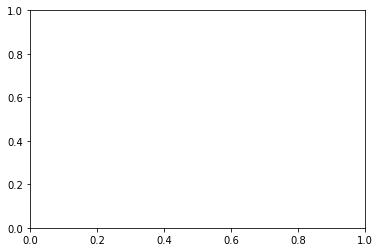

In [10]:
# plot for adx
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["adx"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

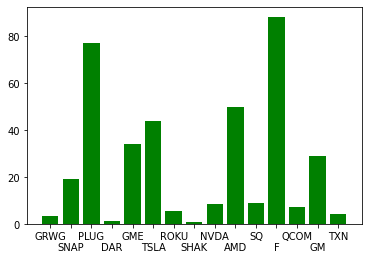

In [16]:
# plot for volume_10_day
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["volume_10_day"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

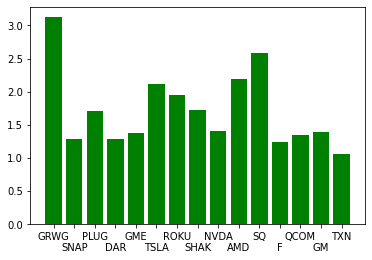

In [17]:
# plot for beta
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["beta"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

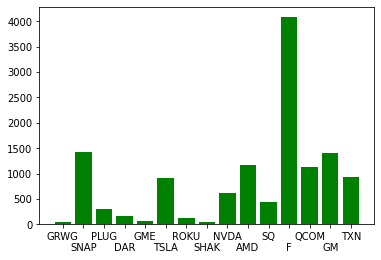

In [18]:
# plot for shareOutstanding
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["shareOutstanding"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

In [19]:
# options
for stock in data_1.index:
    display(stock)
    
    # get options data
    s = yf.Ticker(str(stock))
    dates = s.options
    op_chain_1 = s.option_chain(dates[0])
    
    # display options data
    display(op_chain_1)
    

'GRWG'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   GRWG210129C00020000 2021-01-21 15:22:24    20.0      28.75  28.75  31.55   
1   GRWG210129C00024000 2021-01-08 14:34:45    24.0      23.85  24.50  27.60   
2   GRWG210129C00024500 2021-01-22 19:58:16    24.5      24.95  23.55  26.60   
3   GRWG210129C00025000 2021-01-08 15:28:33    25.0      19.35  24.30  26.60   
4   GRWG210129C00025500 2021-01-14 17:47:06    25.5      24.35  23.90  26.35   
..                  ...                 ...     ...        ...    ...    ...   
61  GRWG210129C00058000 2021-01-22 18:36:38    58.0       0.36   0.37   0.45   
62  GRWG210129C00060000 2021-01-22 20:39:07    60.0       0.26   0.23   0.29   
63  GRWG210129C00065000 2021-01-22 19:21:09    65.0       0.11   0.10   0.14   
64  GRWG210129C00070000 2021-01-22 20:37:05    70.0       0.07   0.06   0.09   
65  GRWG210129C00075000 2021-01-22 20:36:33    75.0       0.04   0.04   0.05   

      change  percentChan

'SNAP'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   SNAP210129C00035000 2021-01-21 16:48:38    35.0      18.32  18.20  19.25   
1   SNAP210129C00036000 2021-01-22 18:15:04    36.0      17.62  17.40  17.80   
2   SNAP210129C00040000 2021-01-22 18:15:04    40.0      13.65  13.25  14.25   
3   SNAP210129C00042000 2020-12-21 20:54:56    42.0      11.24  11.55  12.55   
4   SNAP210129C00042500 2021-01-11 16:19:37    42.5      12.45  10.80  11.85   
5   SNAP210129C00043000 2021-01-22 15:03:53    43.0      11.23  10.50  11.10   
6   SNAP210129C00043500 2021-01-22 19:15:14    43.5      10.05   9.85  10.80   
7   SNAP210129C00044000 2021-01-21 16:47:21    44.0      10.05   9.30  10.45   
8   SNAP210129C00044500 2021-01-22 16:47:14    44.5       9.25   9.10   9.40   
9   SNAP210129C00045000 2021-01-22 20:34:55    45.0       8.41   8.60   8.95   
10  SNAP210129C00045500 2021-01-22 20:06:16    45.5       8.10   7.80   8.85   
11  SNAP210129C00046000 20

'PLUG'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   PLUG210129C00015000 2021-01-22 18:02:54    15.0      49.45  51.60  52.35   
1   PLUG210129C00019500 2021-01-20 19:36:55    19.5      42.15  47.20  47.60   
2   PLUG210129C00020000 2021-01-08 19:22:19    20.0      32.50  46.65  47.35   
3   PLUG210129C00020500 2021-01-19 16:49:11    20.5      44.15  46.05  46.75   
4   PLUG210129C00021000 2021-01-22 14:41:01    21.0      42.85  45.55  46.35   
..                  ...                 ...     ...        ...    ...    ...   
93  PLUG210129C00092000 2021-01-22 20:36:04    92.0       0.20   0.15   0.16   
94  PLUG210129C00093000 2021-01-22 20:36:16    93.0       0.17   0.13   0.15   
95  PLUG210129C00094000 2021-01-22 20:24:08    94.0       0.15   0.11   0.14   
96  PLUG210129C00095000 2021-01-22 20:57:46    95.0       0.13   0.12   0.13   
97  PLUG210129C00100000 2021-01-22 20:58:31   100.0       0.07   0.05   0.07   

       change  percentCha

'DAR'

Options(calls=        contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   DAR210219C00040000 2021-01-13 20:17:06    40.0      28.00  25.00  29.50   
1   DAR210219C00045000 2021-01-12 15:51:38    45.0      21.18  21.60  23.70   
2   DAR210219C00050000 2021-01-14 14:54:56    50.0      18.70  16.30  19.20   
3   DAR210219C00055000 2021-01-21 20:59:35    55.0      11.43  11.50  12.30   
4   DAR210219C00060000 2021-01-22 16:15:04    60.0       7.50   7.50   7.90   
5   DAR210219C00065000 2021-01-22 20:51:15    65.0       4.14   4.10   4.30   
6   DAR210219C00070000 2021-01-22 20:54:24    70.0       1.90   1.80   2.00   
7   DAR210219C00075000 2021-01-22 20:58:59    75.0       0.75   0.65   0.75   
8   DAR210219C00080000 2021-01-22 20:08:31    80.0       0.20   0.15   0.30   
9   DAR210219C00085000 2021-01-20 14:30:02    85.0       0.25   0.00   0.65   
10  DAR210219C00090000 2021-01-19 15:34:03    90.0       0.13   0.00   0.60   

    change  percentChange  volume  op

'GME'

Options(calls=        contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   GME210129C00000500 2021-01-22 20:55:07     0.5      65.15  63.50  65.70   
1   GME210129C00001000 2021-01-22 19:44:17     1.0      58.15  63.00  65.20   
2   GME210129C00002500 2021-01-22 18:32:00     2.5      58.55  46.20  46.65   
3   GME210129C00003000 2021-01-22 19:49:39     3.0      60.45  45.70  46.40   
4   GME210129C00003500 2021-01-22 17:58:03     3.5      66.85  60.50  62.70   
..                 ...                 ...     ...        ...    ...    ...   
72  GME210129C00056000 2021-01-22 20:59:48    56.0      14.00  13.35  15.70   
73  GME210129C00057000 2021-01-22 20:59:24    57.0      13.65  12.80  15.00   
74  GME210129C00058000 2021-01-22 20:59:46    58.0      12.50  12.25  14.00   
75  GME210129C00059000 2021-01-22 20:59:51    59.0      13.00  11.75  13.50   
76  GME210129C00060000 2021-01-22 20:59:54    60.0      11.75  11.85  11.90   

       change  percentChange  volume 

'TSLA'

Options(calls=          contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0    TSLA210129C00200000 2021-01-21 16:59:57   200.0     647.35  633.60   
1    TSLA210129C00350000 2021-01-20 17:42:17   350.0     499.30  495.95   
2    TSLA210129C00360000 2021-01-22 19:19:46   360.0     478.40  472.20   
3    TSLA210129C00370000 2021-01-22 15:23:19   370.0     466.35  475.95   
4    TSLA210129C00390000 2021-01-21 14:49:42   390.0     455.50  455.95   
..                   ...                 ...     ...        ...     ...   
195  TSLA210129C01460000 2021-01-22 20:15:50  1460.0       0.06    0.06   
196  TSLA210129C01480000 2021-01-22 20:58:03  1480.0       0.06    0.05   
197  TSLA210129C01500000 2021-01-22 20:59:37  1500.0       0.07    0.06   
198  TSLA210129C01600000 2021-01-22 20:49:33  1600.0       0.05    0.04   
199  TSLA210129C01700000 2021-01-22 20:59:33  1700.0       0.05    0.04   

        ask    change  percentChange  volume  openInterest  impliedVolatility  \
0   

'ROKU'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0   ROKU210129C00170000 2021-01-19 20:38:06   170.0     261.78  251.55   
1   ROKU210129C00200000 2021-01-04 17:09:37   200.0     120.25  221.55   
2   ROKU210129C00215000 2021-01-15 18:09:19   215.0     196.72  206.55   
3   ROKU210129C00225000 2021-01-07 14:33:22   225.0     191.30  196.55   
4   ROKU210129C00230000 2021-01-21 19:00:22   230.0     192.99  191.55   
..                  ...                 ...     ...        ...     ...   
94  ROKU210129C00580000 2021-01-21 20:47:11   580.0       0.12    0.00   
95  ROKU210129C00590000 2021-01-21 19:40:48   590.0       0.10    0.01   
96  ROKU210129C00600000 2021-01-22 20:34:05   600.0       0.02    0.01   
97  ROKU210129C00610000 2021-01-21 18:24:34   610.0       0.10    0.00   
98  ROKU210129C00620000 2021-01-22 18:18:08   620.0       0.06    0.01   

       ask  change  percentChange  volume  openInterest  impliedVolatility  \
0   254.25    0.00 

'SHAK'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   SHAK210129C00060000 2021-01-12 16:30:31    60.0      37.10  48.55  53.05   
1   SHAK210129C00065000 2021-01-04 20:38:28    65.0      17.75  43.55  48.10   
2   SHAK210129C00075000 2021-01-04 20:38:28    75.0       9.00  33.60  38.00   
3   SHAK210129C00078500 2021-01-19 20:44:05    78.5      33.41  30.00  34.35   
4   SHAK210129C00079000 2021-01-20 14:41:30    79.0      34.11  30.10  34.15   
5   SHAK210129C00080000 2021-01-04 19:47:01    80.0       5.90  28.50  32.95   
6   SHAK210129C00081000 2021-01-08 19:44:42    81.0      10.30  27.70  31.10   
7   SHAK210129C00082500 2021-01-06 16:11:58    82.5       6.92  26.45  30.40   
8   SHAK210129C00083500 2021-01-06 16:53:54    83.5       6.65  25.60  29.35   
9   SHAK210129C00084000 2021-01-12 16:33:01    84.0      13.75  25.40  28.10   
10  SHAK210129C00084500 2020-12-31 14:47:16    84.5       4.10  25.00  28.20   
11  SHAK210129C00085000 20

'NVDA'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0   NVDA210129C00265000 2021-01-19 17:58:32   265.0     253.40  281.90   
1   NVDA210129C00275000 2021-01-22 20:27:56   275.0     278.39  271.90   
2   NVDA210129C00295000 2021-01-19 05:06:31   295.0     222.55  252.10   
3   NVDA210129C00300000 2021-01-15 19:52:09   300.0     219.88  247.15   
4   NVDA210129C00315000 2021-01-19 05:06:31   315.0     202.70  232.15   
..                  ...                 ...     ...        ...     ...   
81  NVDA210129C00770000 2021-01-12 16:29:13   770.0       0.30    0.00   
82  NVDA210129C00780000 2021-01-13 17:05:58   780.0       0.13    0.00   
83  NVDA210129C00790000 2021-01-13 16:49:19   790.0       0.01    0.00   
84  NVDA210129C00800000 2021-01-21 20:46:10   800.0       0.02    0.00   
85  NVDA210129C00810000 2021-01-20 15:21:11   810.0       0.01    0.00   

       ask    change  percentChange  volume  openInterest  impliedVolatility  \
0   285.45   0.00

'AMD'

Options(calls=        contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   AMD210129C00050000 2021-01-22 14:30:00    50.0      44.40  40.50  45.00   
1   AMD210129C00055000 2021-01-20 17:19:07    55.0      33.85  35.80  40.00   
2   AMD210129C00060000 2021-01-20 17:42:36    60.0      34.55  30.80  35.30   
3   AMD210129C00065000 2021-01-21 19:41:51    65.0      26.65  26.00  30.00   
4   AMD210129C00068000 2021-01-22 14:32:21    68.0      26.90  25.35  25.65   
..                 ...                 ...     ...        ...    ...    ...   
79  AMD210129C00132000 2021-01-22 17:35:34   132.0       0.10   0.10   0.12   
80  AMD210129C00134000 2021-01-22 14:56:33   134.0       0.11   0.08   0.11   
81  AMD210129C00135000 2021-01-22 20:27:32   135.0       0.07   0.01   0.23   
82  AMD210129C00140000 2021-01-22 20:01:07   140.0       0.05   0.01   0.10   
83  AMD210129C00145000 2021-01-22 20:40:09   145.0       0.04   0.03   0.05   

      change  percentChange  volume  

'SQ'

Options(calls=       contractSymbol       lastTradeDate  strike  lastPrice    bid     ask  \
0   SQ210129C00110000 2021-01-20 16:27:15   110.0     117.42  112.1  113.15   
1   SQ210129C00115000 2020-12-31 14:31:45   115.0     102.63  107.1  108.10   
2   SQ210129C00120000 2021-01-20 14:40:11   120.0     110.00  102.1  103.10   
3   SQ210129C00135000 2021-01-19 14:38:36   135.0      94.10   87.1   88.10   
4   SQ210129C00140000 2020-12-23 18:21:55   140.0      92.58   82.1   83.25   
..                ...                 ...     ...        ...    ...     ...   
64  SQ210129C00340000 2021-01-11 18:09:19   340.0       0.09    0.0    0.03   
65  SQ210129C00345000 2021-01-08 17:45:50   345.0       0.12    0.0    0.03   
66  SQ210129C00350000 2021-01-19 16:35:08   350.0       0.01    0.0    0.08   
67  SQ210129C00355000 2020-12-29 19:17:24   355.0       0.23    0.0    0.10   
68  SQ210129C00360000 2021-01-21 14:36:49   360.0       0.01    0.0    0.10   

    change  percentChange  volume  op

'F'

Options(calls=      contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   F210129C00000500 2021-01-21 19:12:13     0.5      11.05  10.80  10.95   
1   F210129C00001000 2020-12-29 14:30:01     1.0       7.85  10.20  11.05   
2   F210129C00001500 2020-12-17 16:10:41     1.5       7.50   8.25   8.40   
3   F210129C00002500 2021-01-19 05:11:27     2.5       9.14   8.75   9.40   
4   F210129C00003000 2021-01-21 19:32:37     3.0       8.55   8.30   8.45   
5   F210129C00004000 2021-01-21 17:47:36     4.0       7.60   7.45   7.80   
6   F210129C00004500 2020-12-23 15:44:37     4.5       7.10   6.90   6.95   
7   F210129C00005000 2021-01-22 19:41:27     5.0       6.45   6.45   6.60   
8   F210129C00005500 2021-01-20 18:49:17     5.5       5.20   5.95   6.10   
9   F210129C00006000 2021-01-21 15:44:14     6.0       5.55   5.45   5.65   
10  F210129C00006500 2021-01-12 16:54:59     6.5       3.15   4.95   5.10   
11  F210129C00007000 2021-01-22 17:35:06     7.0       4.40   

'QCOM'

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   QCOM210129C00075000 2021-01-19 20:53:18    75.0      88.96  85.00  89.45   
1   QCOM210129C00095000 2021-01-07 19:52:01    95.0      60.20  65.00  69.50   
2   QCOM210129C00100000 2021-01-22 20:18:50   100.0      62.71  60.50  64.65   
3   QCOM210129C00115000 2021-01-08 17:23:36   115.0      41.85  45.35  49.65   
4   QCOM210129C00120000 2021-01-22 19:14:14   120.0      41.95  40.00  44.35   
5   QCOM210129C00125000 2021-01-08 16:27:54   125.0      31.75  35.10  39.70   
6   QCOM210129C00130000 2021-01-21 20:26:02   130.0      34.40  30.80  34.80   
7   QCOM210129C00135000 2021-01-12 19:48:49   135.0      19.60  25.60  29.60   
8   QCOM210129C00138000 2021-01-22 20:42:51   138.0      25.10  22.75  26.70   
9   QCOM210129C00139000 2021-01-07 19:06:56   139.0      16.60  22.10  25.65   
10  QCOM210129C00140000 2021-01-22 19:15:27   140.0      23.25  20.75  24.75   
11  QCOM210129C00141000 20

'GM'

Options(calls=       contractSymbol       lastTradeDate  strike  lastPrice   bid    ask  \
0   GM210129C00030000 2021-01-20 16:55:29    30.0      25.89  25.0  26.25   
1   GM210129C00035000 2021-01-19 17:58:28    35.0      20.55  19.6  21.65   
2   GM210129C00036000 2021-01-13 19:24:10    36.0      19.33  19.2  19.95   
3   GM210129C00037000 2021-01-11 15:08:53    37.0       7.15  18.2  19.05   
4   GM210129C00037500 2021-01-21 16:38:06    37.5      18.45  17.7  18.65   
..                ...                 ...     ...        ...   ...    ...   
56  GM210129C00074000 2021-01-21 20:20:05    74.0       0.03   0.0   0.00   
57  GM210129C00075000 2021-01-22 19:56:22    75.0       0.03   0.0   0.04   
58  GM210129C00076000 2021-01-21 15:17:38    76.0       0.04   0.0   0.04   
59  GM210129C00077000 2021-01-21 14:37:39    77.0       0.03   0.0   0.07   
60  GM210129C00080000 2021-01-21 16:12:40    80.0       0.03   0.0   0.00   

      change  percentChange  volume  openInterest  impliedVol

'TXN'

Options(calls=        contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   TXN210129C00141000 2020-12-29 20:08:26   141.0      20.95  30.95  34.20   
1   TXN210129C00142000 2021-01-04 17:10:26   142.0      20.00  30.25  33.20   
2   TXN210129C00144000 2020-12-23 15:35:11   144.0      19.85  29.85  31.55   
3   TXN210129C00145000 2020-12-21 15:55:51   145.0      17.65  27.95  32.40   
4   TXN210129C00147000 2021-01-08 14:30:04   147.0      26.98  25.25  28.25   
5   TXN210129C00149000 2020-12-23 15:05:18   149.0      15.80  24.90  26.85   
6   TXN210129C00150000 2021-01-06 16:47:06   150.0      16.70  22.85  25.45   
7   TXN210129C00152500 2021-01-07 16:00:50   152.5      15.60  19.35  23.00   
8   TXN210129C00155000 2021-01-22 16:01:44   155.0      20.31  17.45  20.55   
9   TXN210129C00157500 2021-01-12 15:11:33   157.5      15.81  14.95  17.95   
10  TXN210129C00160000 2021-01-22 15:23:06   160.0      15.05  13.35  14.25   
11  TXN210129C00162500 2021-01-22 18:0